In [1]:
import loader
import matplotlib.pyplot as plt
import numpy as np
from RandomAugMix import RandomAugMix, augment_and_mix

In [2]:
data_dir = r"C:\Users\tanch\Documents\NTU\NTU Year 3\Sem 1\CZ4042 Deep Learning and Neural Networks\Assignment 2\code\data\FMD (1)\image"
X_train, y_train, X_test, y_test = loader.load_FMD(data_dir,(200,200))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((797, 200, 200, 3), (797,), (200, 200, 200, 3), (200,))

# RandomAugMix
- Required inputs:
    - image: Raw input image as np.ndarray of shape (h, w, c)
- hyperparameters:
    - severity: Severity of underlying augmentation operators (between 1 to 10).
    -width: Width of augmentation chain
    -depth: Depth of augmentation chain. -1 enables stochastic depth uniformly
  from [1, 3]
    -alpha: Probability coefficient for Beta and Dirichlet distributions.
- Returns:
    - Augmented and mixed image as np.ndarray of shape (h, w, c)

In [6]:
RAM = RandomAugMix(severity=3, width=3, alpha=1., p=1.)

### augment one image

In [7]:
# augment 1 image
i = 1
augmented_image = RAM.apply(X_train[i])

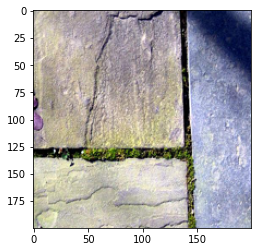

In [9]:
# original
plt.imshow(X_train[i])

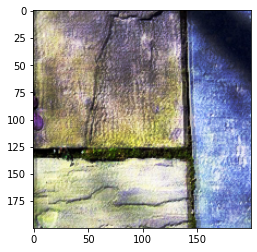

In [8]:
# augmented image 
plt.imshow(augmented_image.astype(np.uint8))

### augment whole dataset

In [41]:
def augment_dataset(dataset, func):
    return np.array([func(img) for img in dataset])

In [31]:
X_train_augmented = augment_dataset(X_train, RAM.apply)

In [42]:
def plot_imgs(dataset_show, seed = 0):
    np.random.seed(seed)
    from pylab import rcParams
    rcParams['figure.figsize'] = 20,10
    for i in range(2):
        f, axarr = plt.subplots(1,5)
        for p in range(5):
            idx = np.random.randint(0, len(dataset_show))
            img = dataset_show[idx].astype(np.uint8)
            axarr[p].imshow(img)
            axarr[p].set_title(idx)

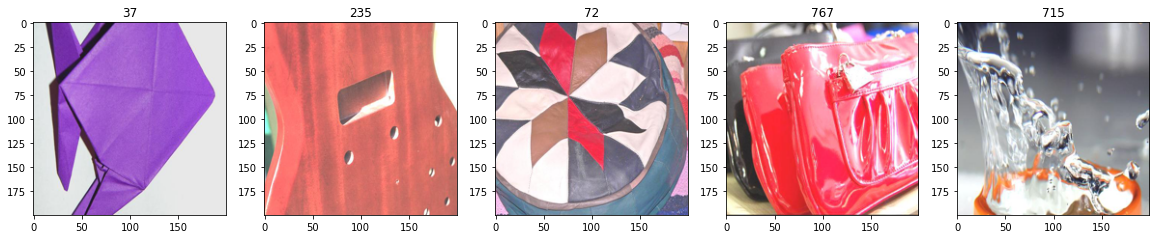

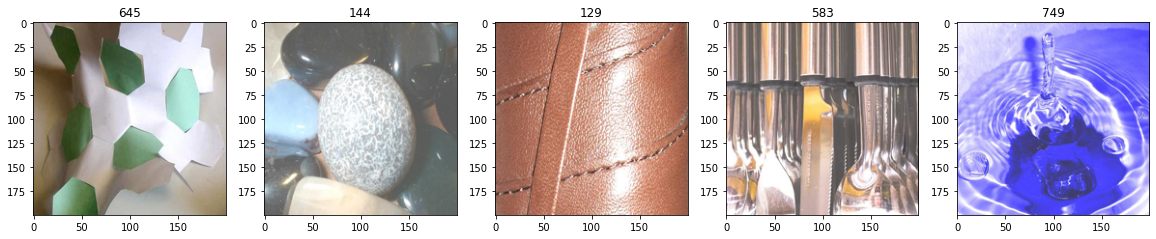

In [44]:
# original
plot_imgs(X_train,1)

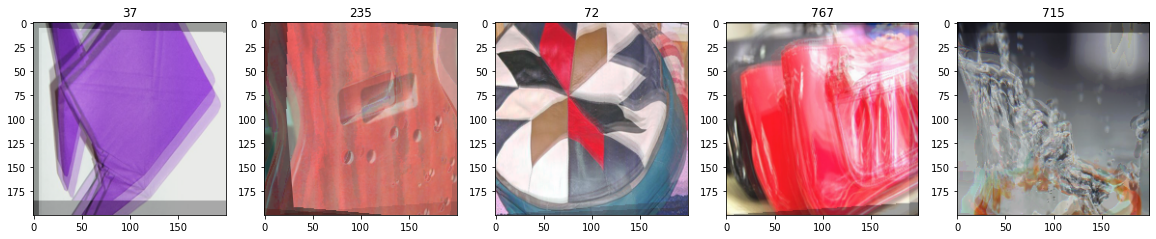

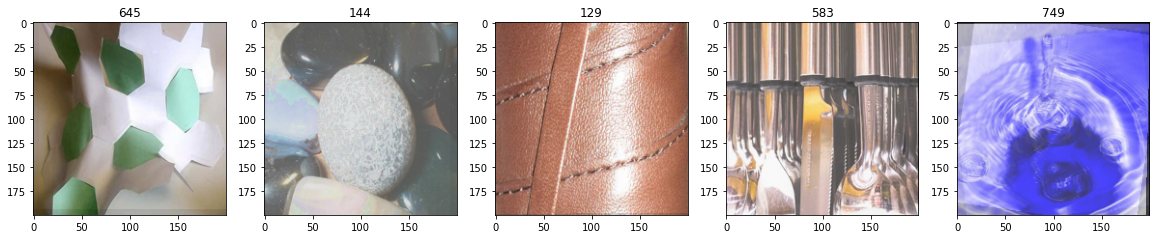

In [43]:
# augmented
plot_imgs(X_train_augmented, seed = 1)